# ハッブル-ルメートルの法則

- [Calán/Tololo Supernova Survey](https://en.wikipedia.org/wiki/Calán/Tololo_Survey)の超新星データ

- [Perlmutter et al. (1999)](https://iopscience.iop.org/article/10.1086/307221) から取得

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 日本語も使えるようにしておく。
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d425e310de087bc003c385ecd1fa4e5e95aa9e6c529b48ebe856201a6a6f8d53
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


## データの読み込み

In [3]:
d = pd.read_csv("supernovae.txt")

In [4]:
d

,z,m
0,0.030,16.26
1,0.050,17.63
2,0.026,16.08
3,0.075,18.43
4,0.026,16.28
5,0.014,14.47
6,0.101,19.16
7,0.020,15.18
8,0.036,16.66
9,0.045,17.61


In [5]:
z = np.array(d["z"]) # 赤方偏移
m = np.array(d["m"]) # 最大光度のときの超新星の見かけの等級

## 赤方偏移$z$を後退速度$v$に換算

ここに含まれる比較的近傍の超新星については、赤方偏移$z=\Delta\lambda/\lambda$（波長の伸びた割合）と後退速度$v$の間に
$$
    z = {v\over c}
$$
の関係がある。ただし$c$は真空中の光速度で、値は$c\approx 3\times10^5\,\mathrm{km/s}$である。この関係を用いて、$z$を後退速度$v$（単位は$\mathrm{km/s}$）に換算しよう。

In [6]:
v = 3e5 * z # 3e5は3x10^5を表す

In [7]:
v

array([ 9000., 15000.,  7800., 22500.,  7800.,  4200., 30300.,  6000.,
       10800., 13500., 12900., 23700., 18900., 21300., 15600., 15000.])

## 見かけの等級$m$から距離$d$を推定

このデータ中のIa型超新星は全て、距離$D=10\,\mathrm{pc}$（年周視差が$0.1$秒角になる距離）に置いたとき、等級がおおよそ$M=-19.3$になることが知られている。つまり、真の明るさがわかっている。これを既知として、見かけの等級$m$から距離$d$を推定したい。

観測された超新星の見かけの明るさ（単位時間・単位面積あたりに地球に届くエネルギー）を$f$、超新星を**距離$D=10\,\mathrm{pc}$に置いたときの**見かけの明るさを$F$とする。このとき、見かけの明るさ$f$は距離の2乗に反比例する（逆二乗の法則）から
$$
f = F\cdot \left(D \over d\right)^2
$$
である。これを$d$について解くと、
$$
\left(d \over D\right)^2 = {F \over f} \quad \to \quad d = D\sqrt{F \over f}
$$
となる。

ここで、第11回で示した見かけの明るさと等級の関係を使うと、$f\propto 10^{-0.4m}$, $F \propto 10^{-0.4M}$  が成り立つ。よって
$$
    {F\over f} = {10^{-0.4M} \over 10^{-0.4m}} = 10^{-0.4(M-m)}
$$
である。これより
$$
    d = D\sqrt{F\over f} = D \cdot \left[10^{-0.4(M-m)}\ \ \right]^{1/2} = D \cdot 10^{-0.2(M-m)}\ = D \cdot 10^{0.2(m-M)} = 10\cdot 10^{0.2(m-M)}\ \ \mathrm{pc} = 10^{1+0.2(m-M)}\ \ \mathrm{pc}
$$
となることがわかる。

最後の式を用いて、$m$のデータと$M=-19.3$から、データ中の超新星の距離$d$を求めよう。$\,\mathrm{pc}$単位だと数が大きくなるので、単位は$\,\mathrm{Mpc}=10^6\,\mathrm{pc}$にしよう。

In [8]:
M = -19.3
d = 10**(1 + 0.2*(m-M)) / 1e6 # Mpcに換算するときは10^6で割る

In [9]:
d

array([129.41958414, 243.22040091, 119.1242008 , 351.56044053,
       130.61708881,  56.75446054, 492.03953568,  78.70457897,
       155.59656316, 240.99054287, 198.60949174, 326.58783217,
       322.10687913, 335.73761424, 233.34580623, 250.03453617])

## 後退速度$v$と距離$d$の関係（ハッブル-ルメートルの法則）

上で求めた$v$ ($\mathrm{km/s}$)を縦軸、$d$($\mathrm{Mpc}$)を横軸にしてデータを点でプロットしてみよう。軸のラベルも入れること。

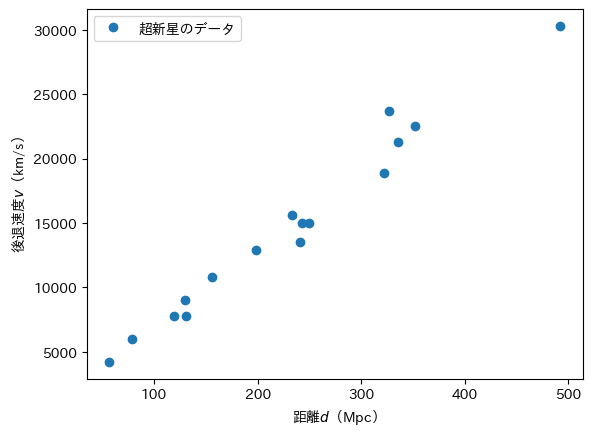

In [10]:
plt.plot(d, v, "o", label="超新星のデータ")
plt.xlabel("距離$d$（Mpc）")
plt.ylabel("後退速度$v$（km/s）")
plt.legend(loc="best");

比例関係になっていそうなのがわかるはずである。これをさらに確認するために、傾き$H_0$（[ハッブル定数](https://astro-dic.jp/hubble-constant/)）を$v/d$の平均値として推定し、データ点とともに$v=H_0d$という直線をプロットしてみよう。

In [11]:
H0 = np.mean(v/d)

In [12]:
H0

65.25871229182793

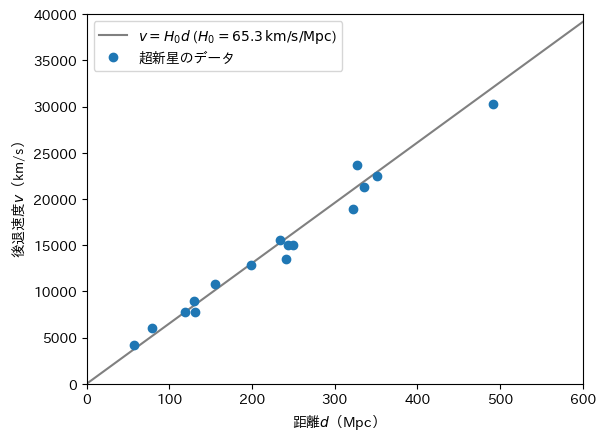

In [13]:
x = np.linspace(0, 600, 100) # 直線をプロットするための配列を定義（lecture8-1.ipynb参照）
plt.plot(x, H0*x, "-", color="gray", label="$v=H_0 d$ ($H_0=65.3\,\mathrm{km/s/Mpc}$)")
plt.plot(d, v, "o", label="超新星のデータ")
plt.xlabel("距離$d$（Mpc）")
plt.ylabel("後退速度$v$（km/s）")
plt.xlim(0, 600)
plt.ylim(0, 40000)
plt.legend(loc="best");

## おまけ

上で求めた$H_0$の単位は$\mathrm{km/s/Mpc}$になっている。$1\,\mathrm{pc}$は年周視差が$1''=1/3600\,\mathrm{deg}$になる距離だから、
$$
1\,\mathrm{pc} = {1\,\mathrm{au} \over (1/3600)\,\mathrm{deg}}
$$
である。$1\,\mathrm{au}=1.5\times10^8\,\mathrm{km}$として$1\,\mathrm{pc}$を$\mathrm{km}$単位に換算し、$H_0$の逆数 $1/H_0$（これは時間になる）を年の単位で求めよう。この時間はどのように解釈できるか？

解説：上の結果から、$$
{1 \over H_0} = {1\over 65.258...}\,\mathrm{s}\cdot \mathrm{Mpc\over km}
$$
で、Mpcとkmはどちらも長さだからこれは時間になっている。Mpcをkm単位で表せばこの値が秒単位で得られる。

In [14]:
pc_in_km = 1.5e8 / (1/3600 * np.pi / 180.)
Mpc_in_km = 1e6 * pc_in_km

より、秒単位では

In [15]:
1 / H0 * Mpc_in_km

4.7410866458268896e+17

これを年にするには1年の秒数で割ればよい。

In [16]:
year_in_sec = 365.25 * 86400

In [17]:
1 / H0 * Mpc_in_km / year_in_sec

15023596996.688246

つまりこのデータから求めた$1/H_0$は約$1.5\times 10^9$年（$150$億年）になる。これはおおよその宇宙の年齢と考えられ、[ハッブル時間](https://astro-dic.jp/hubble-time/)と呼ばれる。実際、ハッブル-ルメートルの法則$v=H_0 d$を用いて距離/速度を計算すると
$$
{d \over v} = {d \over H_0 d} = {1 \over H_0}
$$
となっている。つまり、$v$がずっと一定なら、時間$1/H_0$遡ると宇宙が一点に集まる。

より現実的な宇宙膨張のモデルと最新のデータを用いて推定した宇宙年齢は上の値よりやや小さく138億年程度である。